Hello, in this notebook we will try to visualise the data using Principle component analysis as a feature reduction model, so that we can visualise the data in a 2D space

- Note, we will be following this tutrials [here](https://spacetelescope.github.io/hellouniverse/notebooks/hello-universe/Classifying_PanSTARRS_sources_with_unsupervised_learning/Classifying_PanSTARRS_sources_with_unsupervised_learning.html)

First let us call some packges

In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
import scipy.stats as st


### Data

let us call the pre-processd images from the prevoius tutorial

In [28]:
%store -r images_trainPre 
%store -r images_testPre 
%store -r labels_train
%store -r labels_test
%store -r classes

Now, we need to extract the feature space from the encoder, this will be done by the model we saved in the last notebook 

In [29]:
model = tf.keras.models.load_model('shallowModel_save/')
print(model.summary())

Model: "autoencoder_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 64)                200768    
                                                                 
 sequential_9 (Sequential)   (None, 56, 56)            203840    
                                                                 
Total params: 404,608
Trainable params: 404,608
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
auto_features_train = model.encoder.predict(images_trainPre)
auto_features_test = model.encoder.predict(images_testPre)

63/63 [==============================] - 0s 1ms/step


In [31]:
auto_df_train = pd.DataFrame(auto_features_train) #turning the data into a dataframe
auto_df_test = pd.DataFrame(auto_features_test) #turning the data into a dataframe


In [32]:
print(auto_df_train.shape)

(8000, 64)


We can see that there is a alot of zeros!, why is that, and also do you think we should remove them??

### Reduce dimensionality with PCA and tSNE

In [33]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [34]:
pca_sample = PCA(n_components=2).fit_transform(auto_df_train)
print(pca_sample.shape)

(8000, 2)


The shape of the reduced PCA sample is now 8000 x 2 from 8000 x 64, now we can plot the reduced samples in a 2D graph

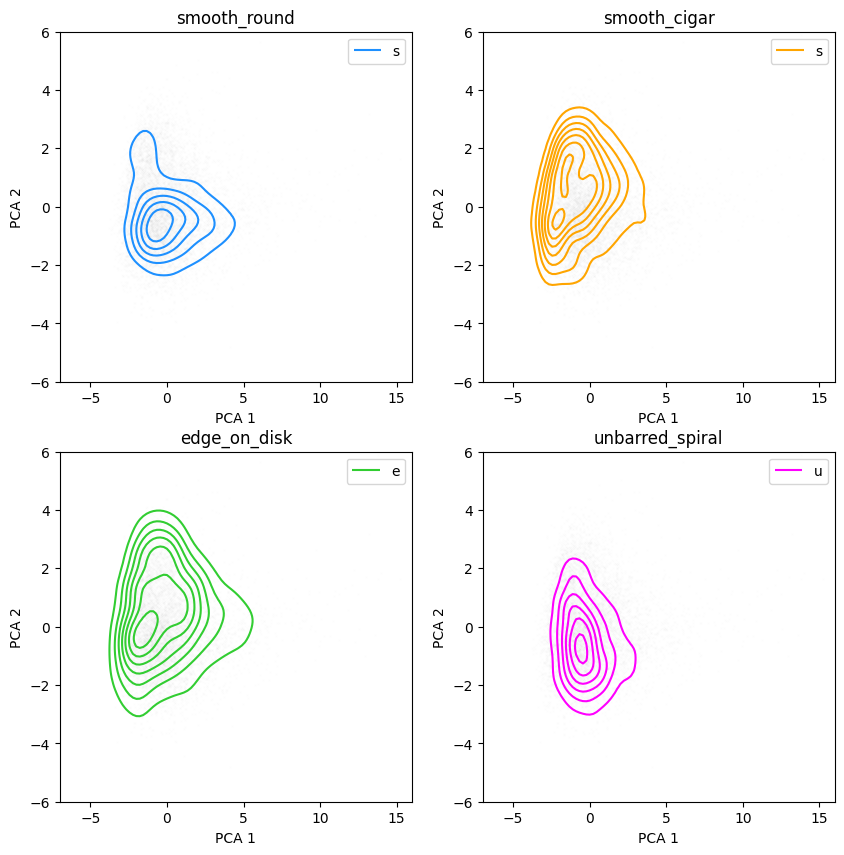

In [35]:
xmin, xmax = -6, 16
ymin, ymax = -6, 4

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

fig = plt.figure(figsize=(10, 10))
colors = ['dodgerblue', 'orange', 'limegreen', 'magenta']
for i in range(4):
    spots = (np.array(labels_train) == i )

    plt.subplot(2, 2, i+1)
    plt.scatter(pca_sample[:, 0], pca_sample[:, 1], s=2, marker='.', color='grey', alpha=0.01)# bins='log', cmap='Greys', alpha=0.5) 

    
    values = np.vstack([pca_sample[:, 0][spots], pca_sample[:, 1][spots]])
    
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    cntr = plt.contour(xx, yy, f, colors=colors[i])
    h1, _ = cntr.legend_elements()
    
    plt.legend([h1[0]], classes[i])
    plt.title(classes[i])
    plt.xlim(-7, 16)
    plt.ylim(-6, 6)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    
plt.show()

In [36]:
idx = np.random.choice(auto_df_train.shape[0], 4000)
tsne_sample = TSNE(n_components=2, init='pca', perplexity=10, learning_rate = 10).fit_transform(np.array(auto_df_train)[idx])

/users/hussein/work/galaxy-cluster/v_gal/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


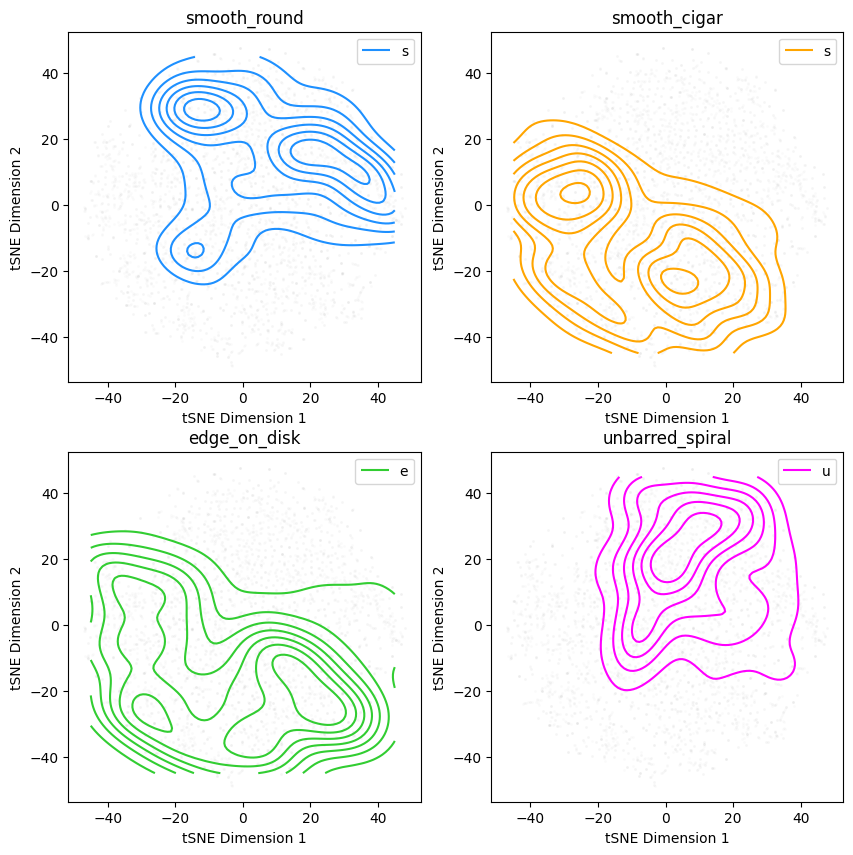

In [37]:
xmin, xmax = -45, 45
ymin, ymax = -45, 45

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

fig = plt.figure(figsize=(10, 10))

for i in range(4):
    spots = (np.array(labels_train[idx]) == i )
    plt.subplot(2, 2, i+1)
    plt.scatter(tsne_sample[:, 0], tsne_sample[:, 1], c='black', s=2, alpha=0.01)
    
    values = np.vstack([tsne_sample[:, 0][spots], tsne_sample[:, 1][spots]])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    cntr = plt.contour(xx, yy, f, colors=colors[i]) 
    h1, _ = cntr.legend_elements()
    
    plt.legend([h1[0]], classes[i])
    plt.title(classes[i])
    plt.xlabel('tSNE Dimension 1')
    plt.ylabel('tSNE Dimension 2')
plt.show()

In [ ]:
fix the graphs to counter lines (from 6 to 3, and 2 aginst each other), or scatter plotts 

we can use it for classification 

A question, how will those graphs look like if we grey scalled images as an input

---

### Save the data

In [38]:
%store auto_df_train 
%store auto_df_test
%store pca_sample

Stored 'auto_df_train' (DataFrame)
Stored 'auto_df_test' (DataFrame)
Stored 'pca_sample' (ndarray)
